In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


### Loading the dataset and checking for completeness and correct types

In [175]:
# Read dataset
df = pd.read_csv('Merged_Dataset.csv')

# Preview dataset
df.head()

,DateTime,Date,Time,Junction,Vehicles,ID,temp,humidity,precip,windspeed,weather conditions,Event_Name,Event_Type,temp_norm,humidity_norm,precip_norm,windspeed_norm
0,01/11/2015 00:00,2015-11-01,00:00:00,1,15,20151101001,78.7,86.0,0.023,8.1,"Rain, Partially cloudy",NONE,NONE,0.522088,0.797488,0.005435,0.027119
1,01/11/2015 01:00,2015-11-01,01:00:00,1,13,20151101011,78.7,86.0,0.023,8.1,"Rain, Partially cloudy",NONE,NONE,0.522088,0.797488,0.005435,0.027119
2,01/11/2015 02:00,2015-11-01,02:00:00,1,10,20151101021,78.7,86.0,0.023,8.1,"Rain, Partially cloudy",NONE,NONE,0.522088,0.797488,0.005435,0.027119
3,01/11/2015 03:00,2015-11-01,03:00:00,1,7,20151101031,78.7,86.0,0.023,8.1,"Rain, Partially cloudy",NONE,NONE,0.522088,0.797488,0.005435,0.027119
4,01/11/2015 04:00,2015-11-01,04:00:00,1,9,20151101041,78.7,86.0,0.023,8.1,"Rain, Partially cloudy",NONE,NONE,0.522088,0.797488,0.005435,0.027119


In [176]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            14592 non-null  object 
 1   Date                14592 non-null  object 
 2   Time                14592 non-null  object 
 3   Junction            14592 non-null  int64  
 4   Vehicles            14592 non-null  int64  
 5   ID                  14592 non-null  int64  
 6   temp                14592 non-null  float64
 7   humidity            14592 non-null  float64
 8   precip              14592 non-null  float64
 9   windspeed           14592 non-null  float64
 10  weather conditions  14592 non-null  object 
 11  Event_Name          14592 non-null  object 
 12  Event_Type          14592 non-null  object 
 13  temp_norm           14592 non-null  float64
 14  humidity_norm       14592 non-null  float64
 15  precip_norm         14592 non-null  float64
 16  wind

In [177]:
# Check missing values
df.isnull().sum()

DateTime              0
Date                  0
Time                  0
Junction              0
Vehicles              0
ID                    0
temp                  0
humidity              0
precip                0
windspeed             0
weather conditions    0
Event_Name            0
Event_Type            0
temp_norm             0
humidity_norm         0
precip_norm           0
windspeed_norm        0
dtype: int64

### Data Cleaning

In [178]:
# The DateTime column is in the format "DD/MM/YYYY HH:MM"
# Using dayfirst=True ensures correct conversion
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True, errors='coerce')

In [179]:
# Extract separate features for EDA
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

In [180]:
# Raw data dont have any null values. eventhough fill missing numeric values with median
numeric_cols = ['Vehicles','temp','humidity','precip','windspeed']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [181]:
# Fill categorical missing values
df['weather conditions'] = df['weather conditions'].fillna('Unknown')
df['Event_Name'] = df['Event_Name'].fillna('None')
df['Event_Type'] = df['Event_Type'].fillna('None')

In [182]:
# Remove duplicate rows
df = df.drop_duplicates()

Ensures dataset has no missing or duplicate values.
Corrects column data types for numeric and categorical variables.

### Feature Engineering

In [183]:
# Day of the week
df['Day_of_Week'] = df['DateTime'].dt.day_name()

In [184]:
df['Hour'] = df['DateTime'].dt.hour
df['Month'] = df['DateTime'].dt.month

In [185]:
# Weekend flag
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday','Sunday']).astype(int)
df.head()

,DateTime,Date,Time,Junction,Vehicles,ID,temp,humidity,precip,windspeed,...,Event_Name,Event_Type,temp_norm,humidity_norm,precip_norm,windspeed_norm,Day_of_Week,Hour,Month,Is_Weekend
0,2015-11-01 00:00:00,2015-11-01,00:00:00,1,15,20151101001,78.7,86.0,0.023,8.1,...,NONE,NONE,0.522088,0.797488,0.005435,0.027119,Sunday,0,11,1
1,2015-11-01 01:00:00,2015-11-01,01:00:00,1,13,20151101011,78.7,86.0,0.023,8.1,...,NONE,NONE,0.522088,0.797488,0.005435,0.027119,Sunday,1,11,1
2,2015-11-01 02:00:00,2015-11-01,02:00:00,1,10,20151101021,78.7,86.0,0.023,8.1,...,NONE,NONE,0.522088,0.797488,0.005435,0.027119,Sunday,2,11,1
3,2015-11-01 03:00:00,2015-11-01,03:00:00,1,7,20151101031,78.7,86.0,0.023,8.1,...,NONE,NONE,0.522088,0.797488,0.005435,0.027119,Sunday,3,11,1
4,2015-11-01 04:00:00,2015-11-01,04:00:00,1,9,20151101041,78.7,86.0,0.023,8.1,...,NONE,NONE,0.522088,0.797488,0.005435,0.027119,Sunday,4,11,1


In [186]:
# Event flag
df['Event_Flag'] = (df['Event_Type'] != 'None').astype(int)
# Normalized columns are already in the dataset: temp_norm, humidity_norm, precip_norm, windspeed_norm

Creating time-based and event-based features is essential to understand patterns in traffic.
Hour, Day_of_Week, Is_Weekend, and Event_Flag will be used for visualizations and model building.

### Aggregating Data for Analysis

In [187]:
# Aggregate vehicle counts per Junction per Hour
hourly_agg = df.groupby(['Date','Hour','Junction'])['Vehicles'].sum().reset_index()
hourly_agg.head()

,Date,Hour,Junction,Vehicles
0,2015-11-01,0,1,15
1,2015-11-01,1,1,13
2,2015-11-01,2,1,10
3,2015-11-01,3,1,7
4,2015-11-01,4,1,9


In [188]:
# Aggregate average weather metrics per Hour per Junction
weather_agg = df.groupby(['Date','Hour','Junction'])[['temp_norm','humidity_norm','precip_norm','windspeed_norm']].mean().reset_index()
weather_agg.head()

,Date,Hour,Junction,temp_norm,humidity_norm,precip_norm,windspeed_norm
0,2015-11-01,0,1,0.522088,0.797488,0.005435,0.027119
1,2015-11-01,1,1,0.522088,0.797488,0.005435,0.027119
2,2015-11-01,2,1,0.522088,0.797488,0.005435,0.027119
3,2015-11-01,3,1,0.522088,0.797488,0.005435,0.027119
4,2015-11-01,4,1,0.522088,0.797488,0.005435,0.027119


In [189]:
# Merge traffic and weather for hourly analysis
hourly_data = pd.merge(hourly_agg, weather_agg, on=['Date','Hour','Junction'])
hourly_data.head()

,Date,Hour,Junction,Vehicles,temp_norm,humidity_norm,precip_norm,windspeed_norm
0,2015-11-01,0,1,15,0.522088,0.797488,0.005435,0.027119
1,2015-11-01,1,1,13,0.522088,0.797488,0.005435,0.027119
2,2015-11-01,2,1,10,0.522088,0.797488,0.005435,0.027119
3,2015-11-01,3,1,7,0.522088,0.797488,0.005435,0.027119
4,2015-11-01,4,1,9,0.522088,0.797488,0.005435,0.027119


In [190]:
# Add DateTime again for proper sorting
hourly_data['DateTime'] = pd.to_datetime(hourly_data['Date'].astype(str) + " " + hourly_data['Hour'].astype(str) + ":00")

In [191]:
#Create Lag Features

# Sort correctly before creating lags
hourly_data = hourly_data.sort_values(by=['Junction','DateTime'])

hourly_data['Vehicles_lag_1'] = hourly_data.groupby('Junction')['Vehicles'].shift(1)
hourly_data['Vehicles_lag_2'] = hourly_data.groupby('Junction')['Vehicles'].shift(2)
hourly_data['Vehicles_lag_24'] = hourly_data.groupby('Junction')['Vehicles'].shift(24)

In [192]:
# Remove rows where lag values are NaN
hourly_data = hourly_data.dropna(subset=['Vehicles_lag_1','Vehicles_lag_2','Vehicles_lag_24'])

In [193]:
# Ensure hourly_data exists
print(hourly_data.columns)

Index(['Date', 'Hour', 'Junction', 'Vehicles', 'temp_norm', 'humidity_norm',
       'precip_norm', 'windspeed_norm', 'DateTime', 'Vehicles_lag_1',
       'Vehicles_lag_2', 'Vehicles_lag_24'],
      dtype='object')


In [194]:
hourly_data.head()

,Date,Hour,Junction,Vehicles,temp_norm,humidity_norm,precip_norm,windspeed_norm,DateTime,Vehicles_lag_1,Vehicles_lag_2,Vehicles_lag_24
24,2015-11-02,0,1,14,0.481928,0.814757,0.471408,0.020339,2015-11-02 00:00:00,15.0,20.0,15.0
25,2015-11-02,1,1,12,0.481928,0.814757,0.471408,0.020339,2015-11-02 01:00:00,14.0,15.0,13.0
26,2015-11-02,2,1,14,0.481928,0.814757,0.471408,0.020339,2015-11-02 02:00:00,12.0,14.0,10.0
27,2015-11-02,3,1,12,0.481928,0.814757,0.471408,0.020339,2015-11-02 03:00:00,14.0,12.0,7.0
28,2015-11-02,4,1,12,0.481928,0.814757,0.471408,0.020339,2015-11-02 04:00:00,12.0,14.0,9.0


Aggregation ensures we analyze traffic patterns per hour per junction, which is essential for congestion prediction.

#### Feature Importance

In [195]:
# Select features
feature_cols = [
    'temp_norm', 'humidity_norm', 'precip_norm', 'windspeed_norm',
    'Vehicles_lag_1', 'Vehicles_lag_2', 'Vehicles_lag_24'
]

x = hourly_data[feature_cols]
y = hourly_data['Vehicles']

# Build model
rf = RandomForestRegressor()
rf.fit(x, y)

# Feature importance
fi = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(fi)

           Feature  Importance
4   Vehicles_lag_1    0.928254
6  Vehicles_lag_24    0.026038
5   Vehicles_lag_2    0.014738
0        temp_norm    0.009436
1    humidity_norm    0.009169
3   windspeed_norm    0.008005
2      precip_norm    0.004360


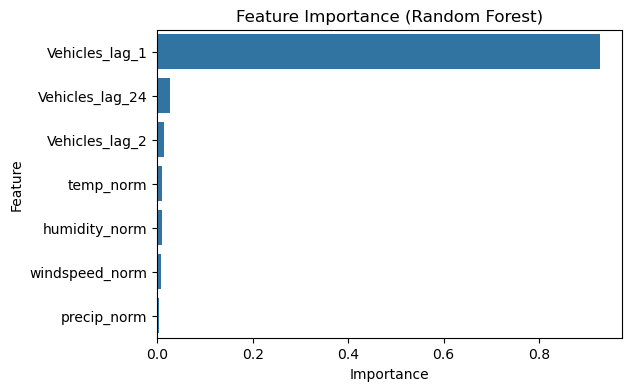

In [196]:
plt.figure(figsize=(6,4))
sns.barplot(x=fi['Importance'], y=fi['Feature'])
plt.title('Feature Importance (Random Forest)')
plt.show()

### Exploratory Data Analysis

#### Traffic Volume Distribution

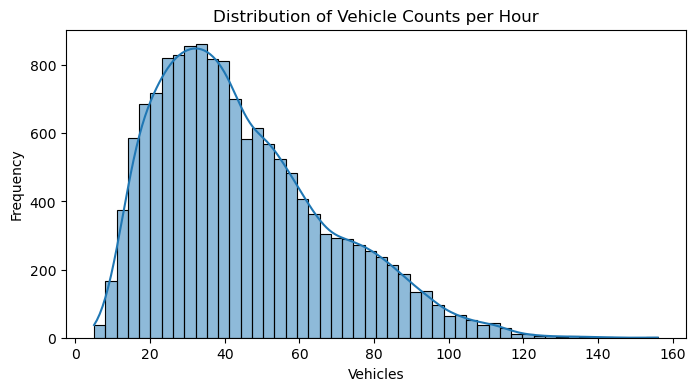

In [197]:
plt.figure(figsize=(8,4))
sns.histplot(hourly_data['Vehicles'], bins=50, kde=True)
plt.title('Distribution of Vehicle Counts per Hour')
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.show()

Understand the distribution of traffic volume: normal, skewed, or with outliers.

#### Traffic Patterns by Hour

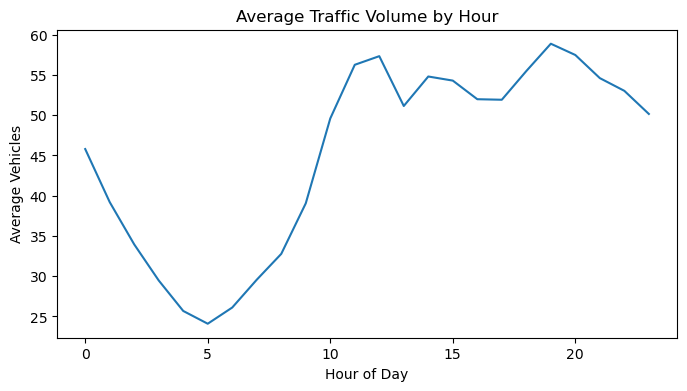

In [198]:
plt.figure(figsize=(8,4))
hourly_mean = hourly_data.groupby('Hour')['Vehicles'].mean()
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values)
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicles')
plt.show()

Visualizes peak traffic hours, typically morning and evening rush hours.

#### Traffic Patterns by Day of Week

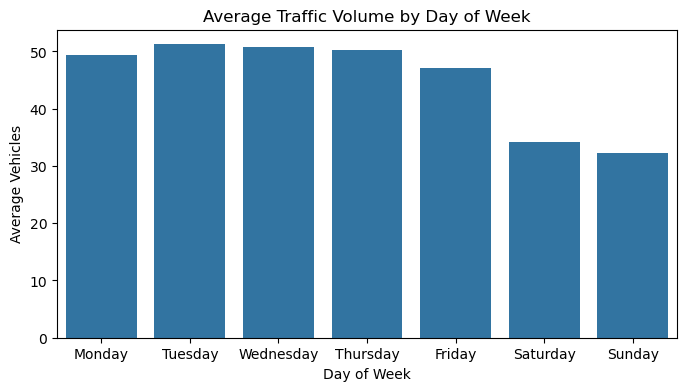

In [199]:
plt.figure(figsize=(8,4))
day_mean = df.groupby('Day_of_Week')['Vehicles'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
sns.barplot(x=day_mean.index, y=day_mean.values)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Vehicles')
plt.show()

Shows whether weekdays have higher traffic than weekends.

#### Traffic Comparison Across Junctions

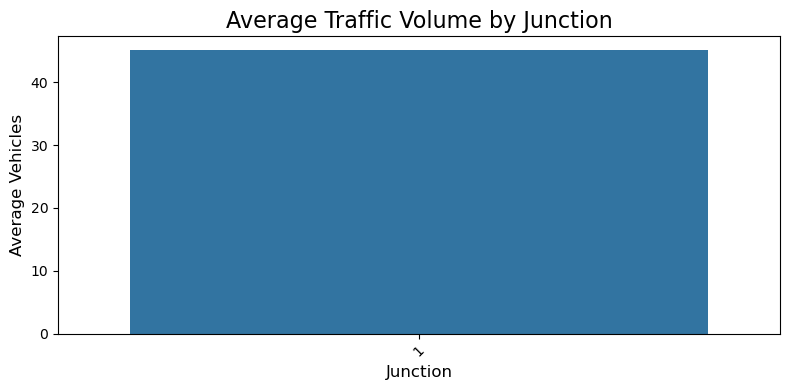

In [200]:
plt.figure(figsize=(8,4))

junction_avg = df.groupby('Junction')['Vehicles'].mean().sort_values(ascending=False)

sns.barplot(x=junction_avg.index, y=junction_avg.values)
plt.title('Average Traffic Volume by Junction', fontsize=16)
plt.xlabel('Junction', fontsize=12)
plt.ylabel('Average Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Heatmap — Traffic by Hour vs Day

In [201]:
# Create pivot table for heatmap
heatmap_data = df.pivot_table(
    values='Vehicles',
    index='Day_of_Week',
    columns='Hour',
    aggfunc='mean'
)

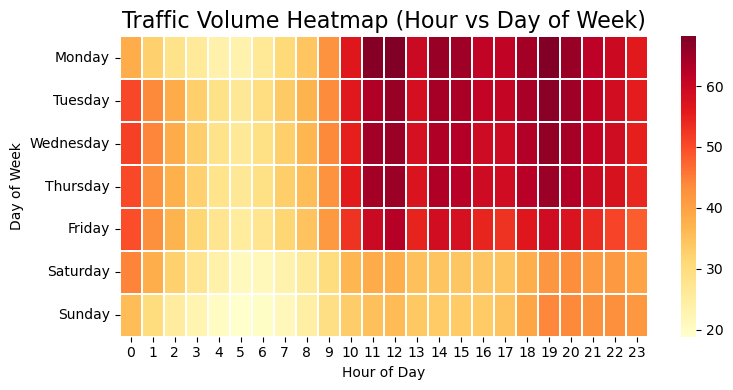

In [202]:
# Reorder days for correct sequence
heatmap_data = heatmap_data.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).fillna(0)

plt.figure(figsize=(8,4))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3)
plt.title('Traffic Volume Heatmap (Hour vs Day of Week)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

Morning & evening rush hours

#### Effect of Events on Traffic

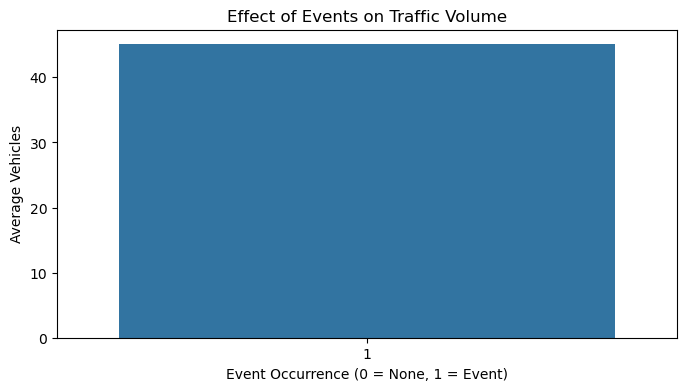

In [203]:
plt.figure(figsize=(8,4))
event_mean = df.groupby('Event_Flag')['Vehicles'].mean()
sns.barplot(x=event_mean.index, y=event_mean.values)
plt.title('Effect of Events on Traffic Volume')
plt.xlabel('Event Occurrence (0 = None, 1 = Event)')
plt.ylabel('Average Vehicles')
plt.show()

Quantifies how traffic increases on event days.

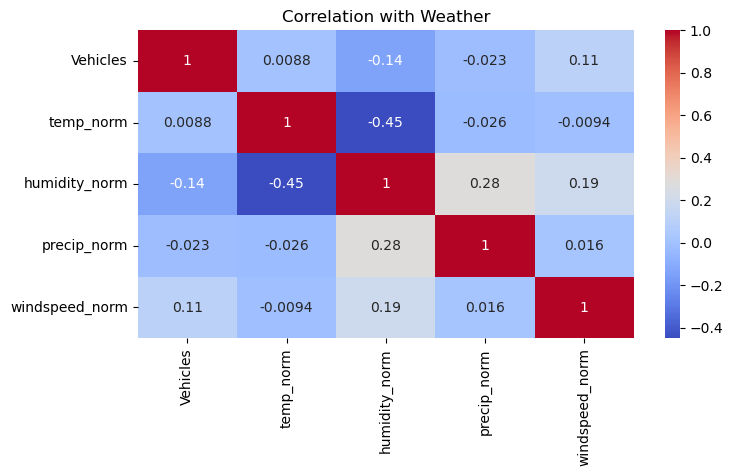

In [204]:
# Weather Correlation
plt.figure(figsize=(8,4))
corr_matrix = hourly_data[['Vehicles','temp_norm','humidity_norm','precip_norm','windspeed_norm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation with Weather")
plt.show()

Identifies if temperature, rainfall, humidity, or windspeed affect traffic volume.

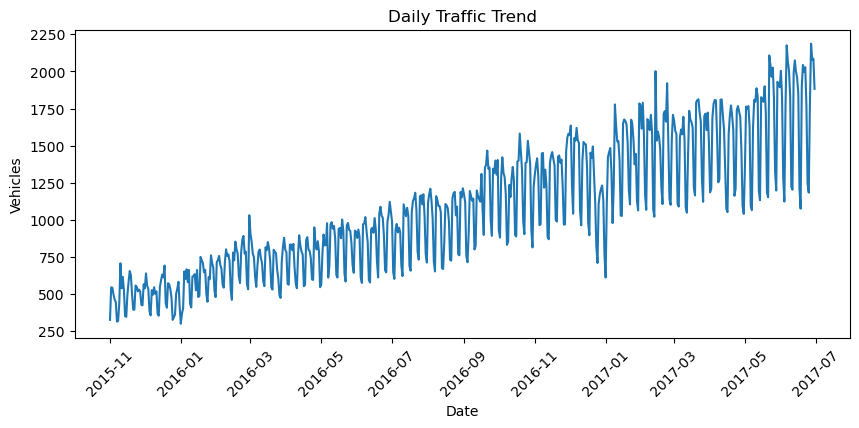

In [205]:
# Traffic Trend Over Time (Line Plot)
daily_trend = df.groupby('Date')['Vehicles'].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_trend.index, daily_trend.values)
plt.title("Daily Traffic Trend")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.xticks(rotation=45)
plt.show()

In [206]:
model_df = pd.merge(
    hourly_data,
    df,
    on=['Date', 'Hour', 'Junction'],
    how='left',
    suffixes=('', '_raw'))

model_df.columns

Index(['Date', 'Hour', 'Junction', 'Vehicles', 'temp_norm', 'humidity_norm',
       'precip_norm', 'windspeed_norm', 'DateTime', 'Vehicles_lag_1',
       'Vehicles_lag_2', 'Vehicles_lag_24', 'DateTime_raw', 'Time',
       'Vehicles_raw', 'ID', 'temp', 'humidity', 'precip', 'windspeed',
       'weather conditions', 'Event_Name', 'Event_Type', 'temp_norm_raw',
       'humidity_norm_raw', 'precip_norm_raw', 'windspeed_norm_raw',
       'Day_of_Week', 'Month', 'Is_Weekend', 'Event_Flag'],
      dtype='object')

#### Save Preprocessed Dataset

In [207]:
# Save full model-ready dataset
model_df.to_csv("Model_Ready_Traffic_Data.csv", index=False)

print("Saved: Model_Ready_Traffic_Data.csv")

Saved: Model_Ready_Traffic_Data.csv


The dataset is now ready for model building (predicting traffic volume) with normalized features and aggregated hourly data